# Exercise 7 - differential privacy

## 7.2 Differential privacy – Practice

In [270]:
import csv

import numpy as np
import matplotlib.pyplot as plot

DATA_FILE = 'data/ex05-fake-registrations.csv'

In [271]:
def categorical_to_integers(categories):
    """Basic mapping of categorical data to integers"""
    forward_mapping = {}
    backward_mapping = {}
    i = 0
    for category in categories:
        if category in forward_mapping:
            continue
            
        forward_mapping[category] = i
        backward_mapping[i] = category
        
        i += 1
        
    mapped_data = [forward_mapping[category] for category in categories]
        
    return forward_mapping, backward_mapping, mapped_data

In [272]:
with open(DATA_FILE, 'r') as f:
    reader = csv.reader(f, delimiter = ',')
    # Skip header
    next(reader)
    data = np.array(list(reader))
    
# Data columns:
#  0: First name
#  1: Last name
#  2: Email
#  3: PLZ
#  4: Location
#  5: OS
#  6: Semester
#  7: Points

In [274]:
epsilon_values = [None, 0.1, 0.5, 2]
def laplace(epsilon):
    if epsilon is None:
        # Special value for 'no noise'
        return 0
    else:
        return np.random.laplace(loc=0, scale=1/epsilon)

In [275]:
def dp_histogram(data, epsilon, bins):
    counts, bins = np.histogram(data, bins=bins)
    return np.array([c + laplace(epsilon) for c in counts])

def plot_dp_histograms(data, epsilon_values, bins, data_name="", figsize=None, width=5, tick_label=None, orientation='horizontal'):
    epsilon_length = len(epsilon_values)
    if figsize is None:
        figsize = (5 * epsilon_length, 5)
        
    plot.figure(figsize=figsize)
        
    for i, epsilon in enumerate(epsilon_values):
        hist = dp_histogram(data, epsilon, bins)
        if orientation == 'horizontal':
            ax = plot.subplot(1, epsilon_count, i + 1)
        else:
            ax = plot.subplot(epsilon_count, 1, i + 1)
        ax.bar(bins[0:-1], hist, width=width, tick_label=tick_label)
        ax.set_title(f"Histogram of {data_name} with epsilon = {epsilon}")
    

### Location

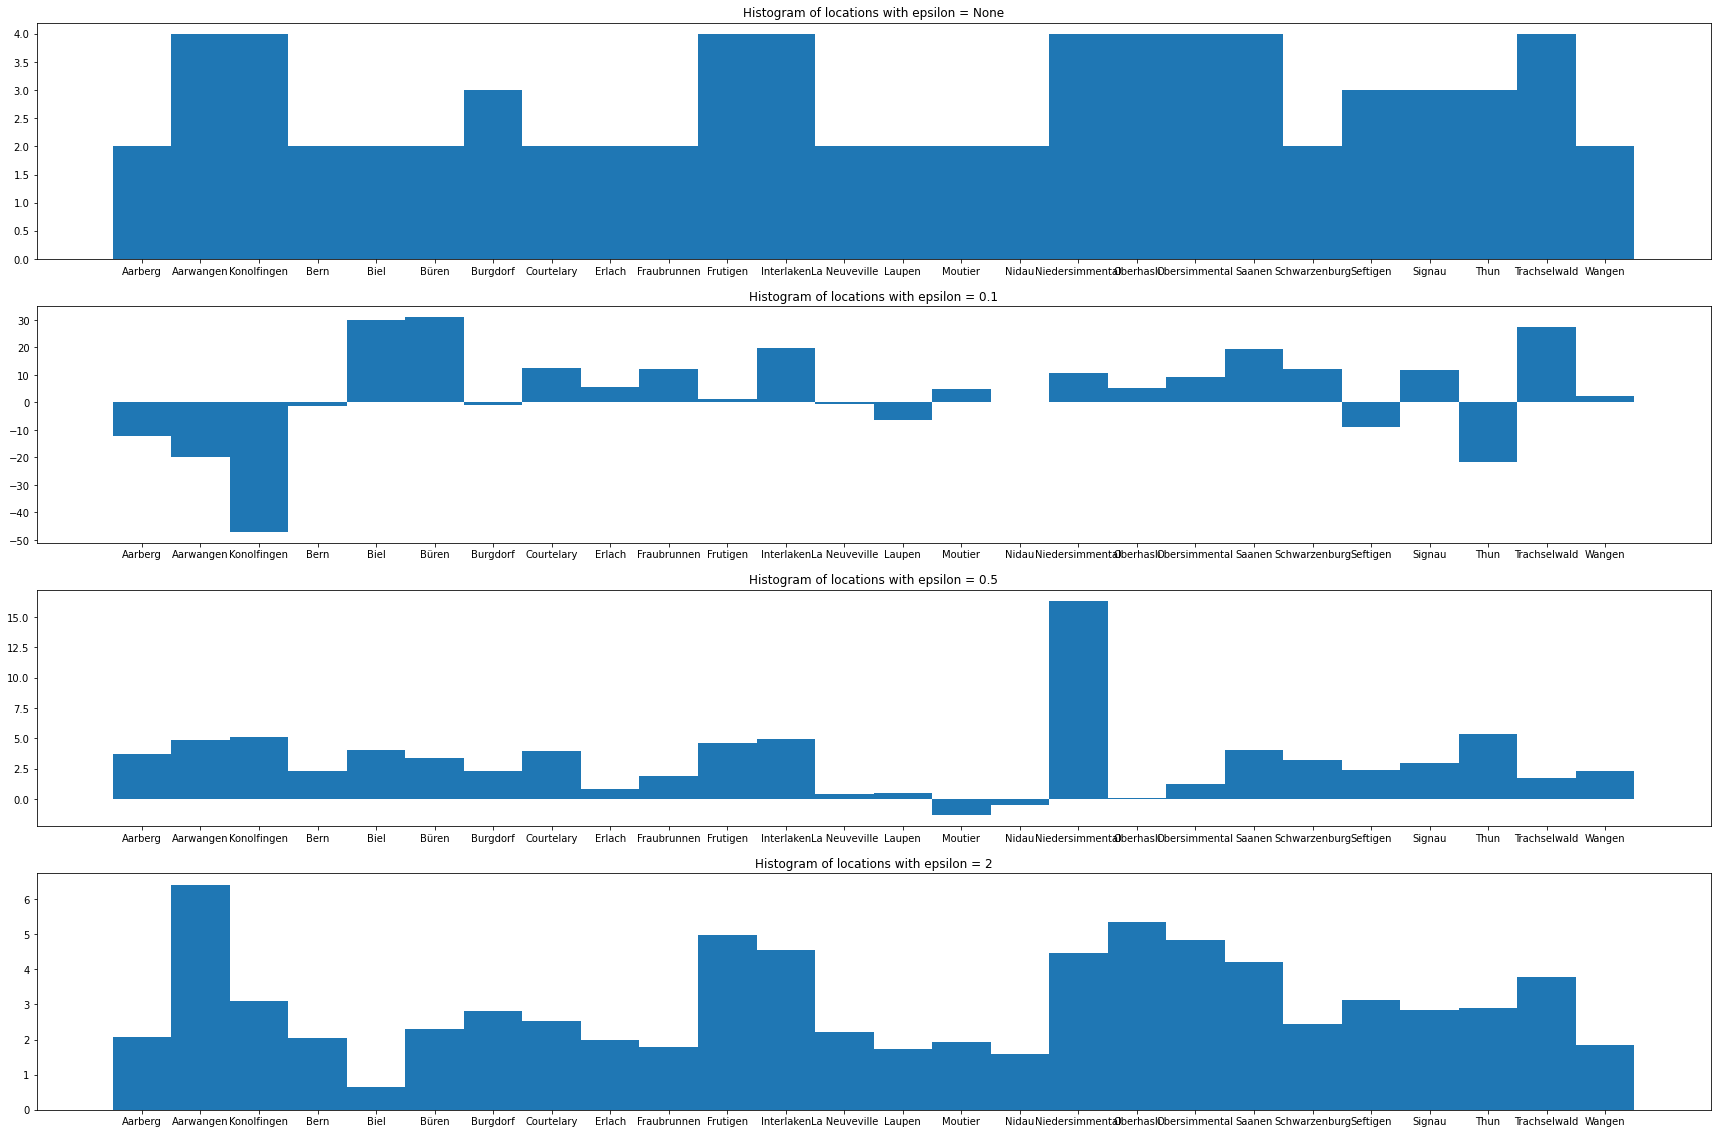

In [280]:
locations = data[:, 4]
forward_mapping, backward_mapping, mapped_locations = categorical_to_integers(locations)

# Each bin will contain one location exactly
# +2 as we start with i=0
bins = list(range(0, max(mapped_locations) + 2))

# We'll also overwrite the labels
labels = [backward_mapping[i] for i in range(max(forward_mapping.values()) + 1)]
plot_dp_histograms(mapped_locations, epsilon_values, bins, data_name="locations", width=1, tick_label=labels, orientation='vertical', figsize=(30, 20))

### Operating system

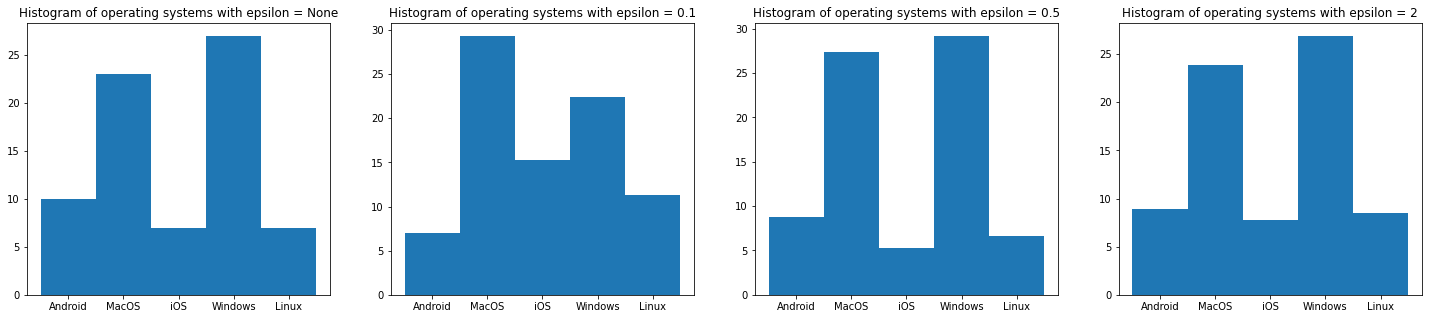

In [277]:
systems = data[:, 5]
forward_mapping, backward_mapping, mapped_systems = categorical_to_integers(systems)

# Each bin will contain one location exactly
# +2 as we start with i=0
bins = list(range(0, max(mapped_systems) + 2))

# We'll also overwrite the labels
labels = [backward_mapping[i] for i in range(max(forward_mapping.values()) + 1)]
plot_dp_histograms(mapped_systems, epsilon_values, bins, data_name="operating systems", width=1, tick_label=labels, orientation='horizontal', figsize=(25, 5))

### Points

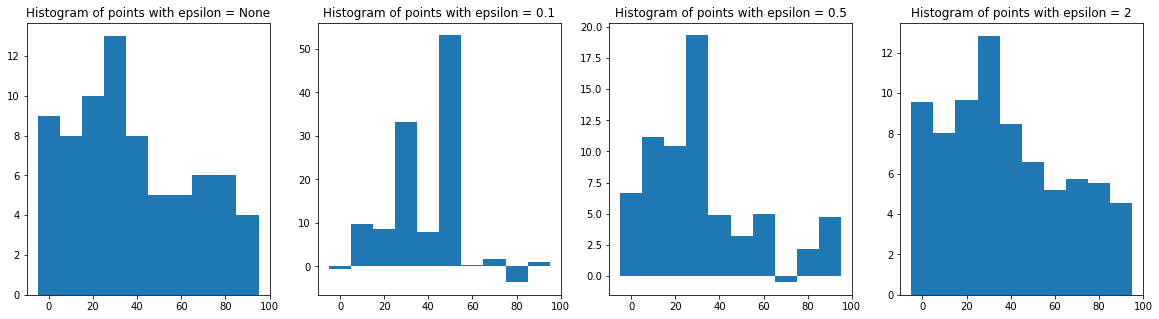

In [279]:
# Bins will be [0, 9), [10, 19), ..., [90, 100]
bins = np.array(list(range(0, 101, 10)))
points = data[:,7].astype(int)

plot_dp_histograms(points, epsilon_values, bins, data_name="points", width=10)
plot.show()